In [79]:
data <- read.csv(file.path("..","data","training_data.csv"))
data <- na.omit(data)
dim(data)
head(data)

[1]  708 4872

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0


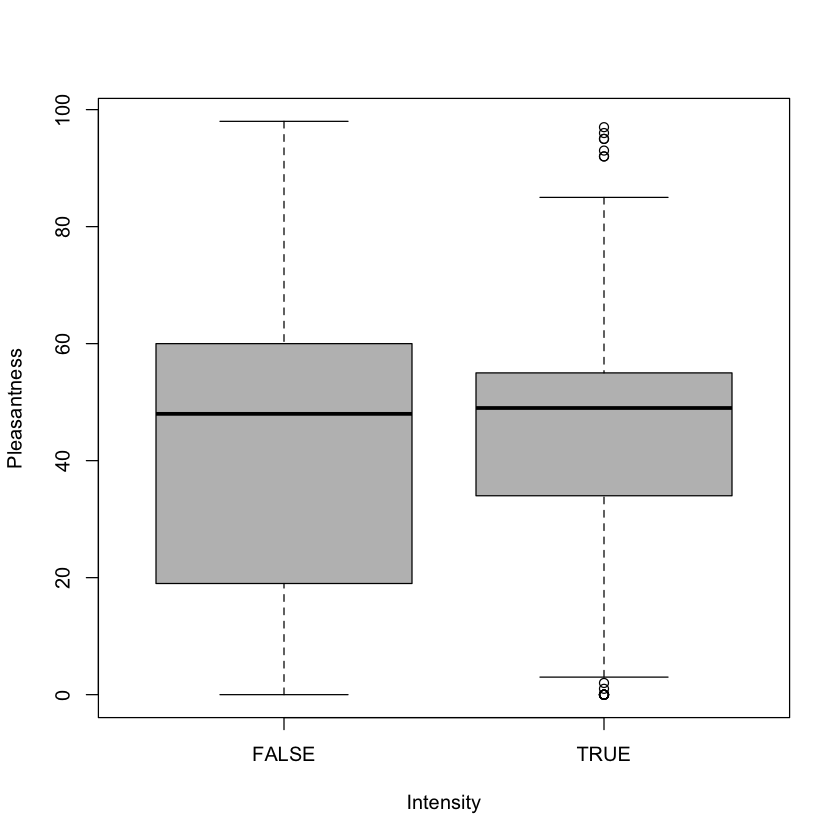

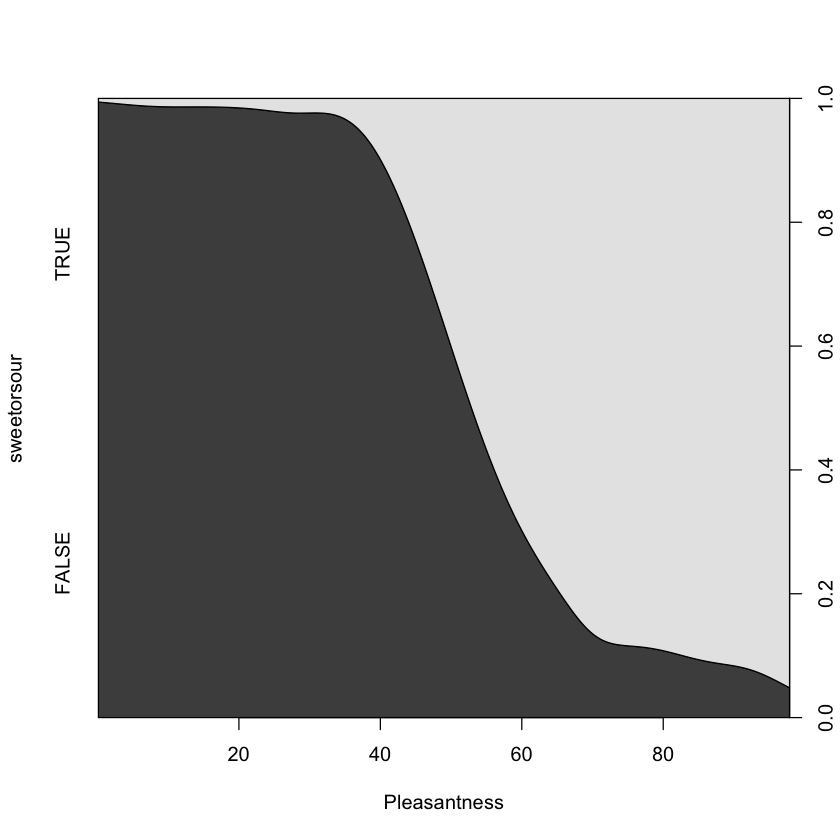

In [80]:
#plot pleasantness en fonction some features (intensity)

plot(data$Intensity, data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))


sweetorsour<- factor(data$SWEETORSOUR)
cdplot( sweetorsour ~ data$VALENCE.PLEASANTNESS, xlab= 'Pleasantness')


interpretation : 

--> on peut voir que sweet or sour devient true quand pleasantness augmente . 

In [81]:
# change the low or high Intensity to binary values 

lookup <- c("low" = 1, "high" = 0)
data$Intensity <- lookup[data$Intensity]
head(data)


Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
library(caret)
#tire des datas : bougeons les collones avec var = 0 and colonnes correlées  .
data <- data[, which(apply(data, 2, var)!=0)] 
cormat<- cor(data)

highly_corr <- findCorrelation(cormat, 0.99, exact = TRUE)
highly_corr
#c<- colnames(cormat)[!apply((lower.tri(cormat) & abs(cormat)>0.7),2,any)] #lower.tri bc cormat matrice symetrique.

#data<-data[, c]
#data<-na.omit(data)
data <-data[,-highly_corr]
data <- data[,-3] 

dim(data)
head(data)



In [15]:
#Feature Engineering : foward regression create new data
library(leaps)


regfit.fwd <- regsubsets(data$VALENCE.PLEASANTNESS ~ . ,  method = "forward", data, nvmax = 200)
regfit.fwd.summary <- summary(regfit.fwd)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1140  linear dependencies found”

Reordering variables and trying again:


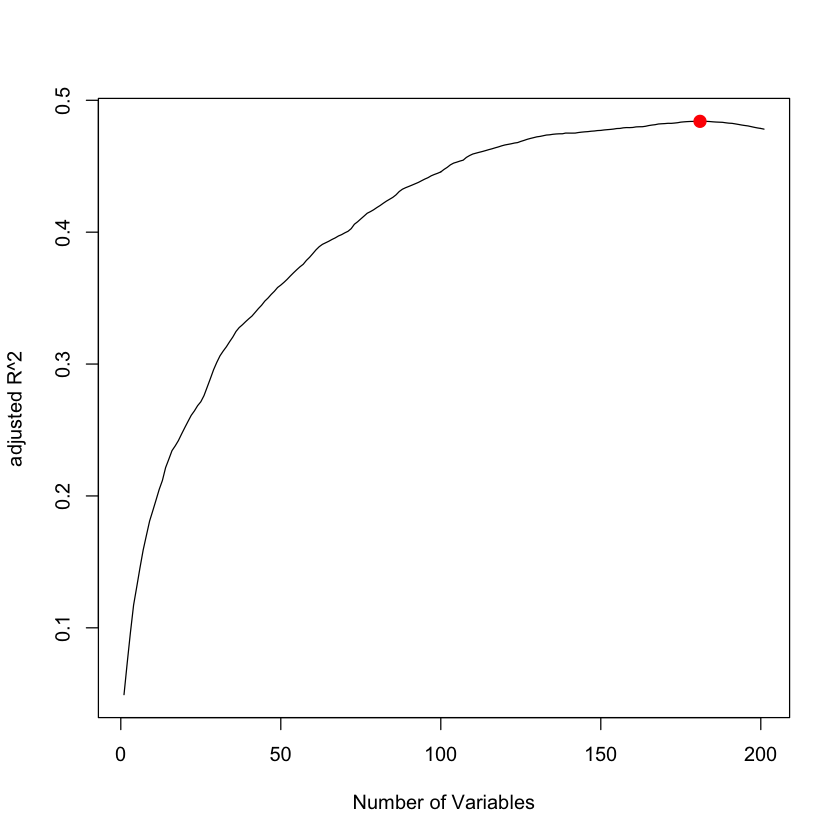

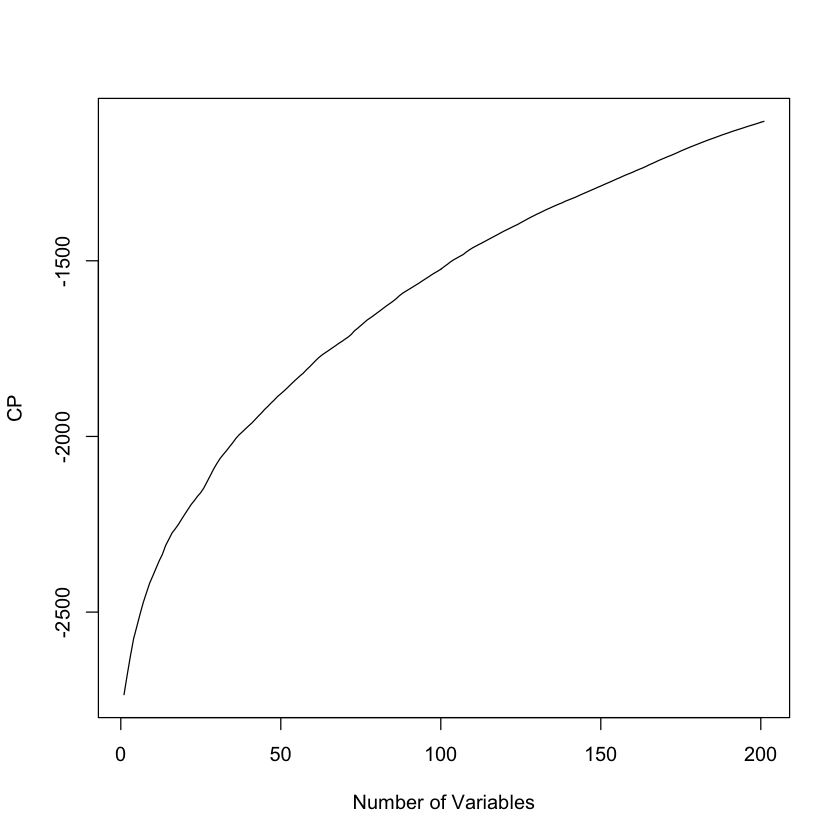

Intensity,VALENCE.PLEASANTNESS,PW5,Psi_e_1s,MPC03,MPC05,MPC06,X2A,X5A,X4v,...,F06.C.N.,F06.N.O.,F06.O.S.,F08.C.C.,DLS_01,LLS_01,CMC.80,Depressant.80,Depressant.50,Infective.80
0,45,0.077,0.000,3.466,3.761,3.714,0.293,0.069,2.952,...,0,0,0,3,1,0.67,1,0,0,1
1,49,0.078,0.000,2.565,2.708,2.197,0.321,0.098,0.674,...,0,0,0,0,1,1.00,0,0,0,0
1,56,0.090,0.000,3.401,3.689,3.466,0.304,0.091,1.624,...,0,0,0,10,1,0.67,1,1,0,1
1,7,0.000,0.001,1.609,0.000,0.000,0.415,0.000,0.000,...,0,0,0,0,1,1.00,0,0,0,0
0,51,0.070,0.000,2.708,2.708,2.197,0.315,0.101,0.911,...,0,0,0,0,1,1.00,0,0,0,0
1,21,0.063,0.000,2.890,2.944,2.639,0.331,0.106,1.209,...,0,0,0,5,1,0.83,1,0,0,1


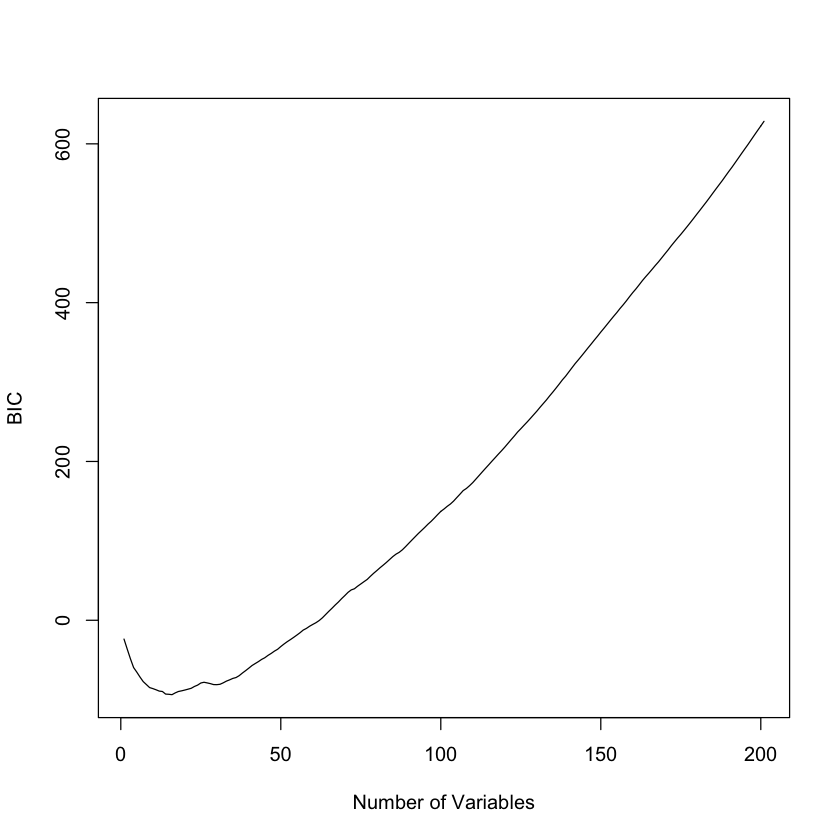

In [16]:

# plot

plot(regfit.fwd.summary$adjr2, type = "l", 
     ,xlab = "Number of Variables", ylab = "adjusted R^2")

adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)


plot(regfit.fwd.summary$cp, type = "l", 
     ,xlab = "Number of Variables", ylab = "CP")
#points(which.min(regfit.fwd.summary$cp), regfit.fwd.summary$adjr2[which.min(regfit.fwd.summary$cp)], col = "red", cex = 2, pch = 20)
plot(regfit.fwd.summary$bic, type = "l", 
     ,xlab = "Number of Variables", ylab = "BIC")





x<- data.frame(
  Adj.R2 = which.max(regfit.fwd.summary$adjr2),
  CP = which.min(regfit.fwd.summary$cp),
  BIC = which.min(regfit.fwd.summary$bic)
)

data_fR <- data[, which(regfit.fwd.summary$which[x$Adj.R2, ]!=0)] #j'ai mis différent de zéro et pas = 
head(data_fR)
data_fCP<-data[, which(regfit.fwd.summary$which[x$CP, ]!=0)]
data_fBIC<-data[, which(regfit.fwd.summary$which[x$BIC, ]!=0)]


--> Gardons les coeff de basé sur adjusted R (CP et BIC enleve trop de predictor)

In [ ]:
#PCA with new_data

data.sc <- scale(data_fR[, -1]) #remove  prediction data()
pca <- prcomp(data.sc, data= F)
plot(pca$x[,1:2])

In [ ]:
biplot(pca, col = c('gray', 'red'), scale = 0)

In [ ]:
s <- svd(data.sc)
sum((s$v - pca$rotation)^2)
sum((s$u %*% diag(s$d) - pca$x)^2)

In [ ]:
pca.var <- pca$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

--> on voit clairement que PC ne sont pas suffisante pour representer les données . 

In [57]:
#divide into training and test set 
set.seed(1)
idx.train <- sample(nrow(data), nrow(data)*1/2)
data.train <- data [idx.train,] 
data.test <- data[-idx.train,]







In [58]:
#perform linear multiple regression on the trainig set 
lm <- lm(data.train$VALENCE.PLEASANTNESS ~ ., data = data.train) 
summary(lm)





Call:
lm(formula = data.train$VALENCE.PLEASANTNESS ~ ., data = data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.5314  -0.9686   0.0000   0.9686  29.5314 

Coefficients: (20 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -9867.524   7242.358  -1.362   0.1760  
Intensity        -1.937      2.797  -0.693   0.4901  
D.Dtr09         -16.557     47.488  -0.349   0.7281  
D.Dtr10          -2.840      5.107  -0.556   0.5794  
PJI2            172.834    192.108   0.900   0.3704  
Psi_e_1d        -72.822    336.351  -0.217   0.8290  
X3A            7498.583   5740.345   1.306   0.1943  
X4A             892.840    627.270   1.423   0.1576  
X5A            -439.076    524.995  -0.836   0.4049  
X5Av            853.638   2469.626   0.346   0.7303  
Yindex         -586.522    276.973  -2.118   0.0366 *
CIC5              9.188     54.481   0.169   0.8664  
J_Dz.m.        1173.504    769.860   1.524   0.1305  
J_Dz.p.

In [59]:
# compare with the test set ??
#test.predict <- predict(lm,data.test)
quality.of.fit <- function(fit, data) {
    RSS <- sum((data$VALENCE.PLEASANTNESS - predict(fit, data))^2)
    TSS <- sum((data$VALENCE.PLEASANTNESS - mean(data$VALENCE.PLEASANTNESS))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}
#on a le droit de mettre abs ??
quality.of.fit(lm, data.train)
quality.of.fit(lm, data.test)



Warning message in predict.lm(fit, data):
“prediction from a rank-deficient fit may be misleading”

Residual standard error:  21.5253574662046  R^2 =  0.797743205595558 


Warning message in predict.lm(fit, data):
“prediction from a rank-deficient fit may be misleading”

Residual standard error:  3068.73641384628  R^2 =  -4178.60701334193 


**INTERPRETATION :**

RSE very high for the test set 

So this model is too flexible ? 



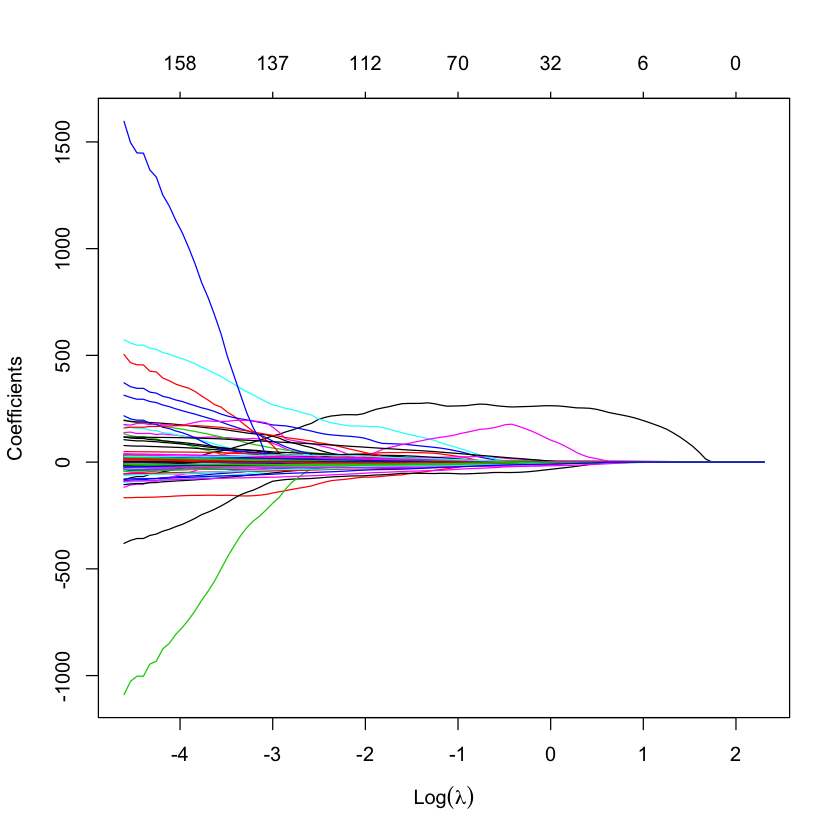

In [66]:
#LASSO L1-REGULARIZATION 

v<-c(colnames(data.train[,-2]))

library(glmnet)
x <- as.matrix(data.train[,v])
y <- data.train$VALENCE.PLEASANTNESS
lasso.mod <- glmnet(x, y, alpha = 1, lambda = 10^seq(1, -2, length = 100))
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

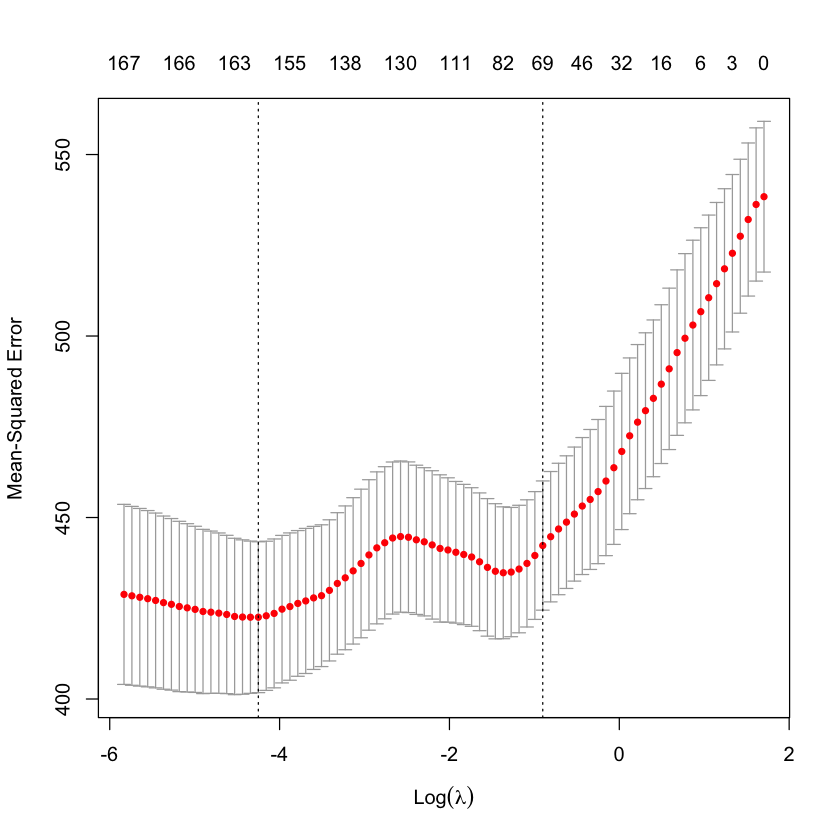

In [67]:
cv.lasso <- cv.glmnet(x, y, alpha = 1, nfold = 10)
plot(cv.lasso)

In [68]:
best.lasso <- glmnet(x, y, alpha = 1, lambda = cv.lasso$lambda.min)
coef(best.lasso)
best.lasso


168 x 1 sparse Matrix of class "dgCMatrix"
                         s0
(Intercept)   -1.625504e+02
Intensity     -1.933351e+00
piPC06         5.200608e+00
X2             2.090271e+01
X4A           -7.132889e+01
VE1_X         -3.490931e+01
VE2_Dz.v.      1.391540e+02
VE1_Dz.p.     -3.287126e+01
SpAbs_B.e.    -4.380063e+00
SpMAD_B.p.     1.693888e+02
ATS6s          3.338299e+00
ATSC7m         5.038635e+00
ATSC8m        -2.103282e+00
ATSC1e         1.796214e+02
MATS1v         .           
MATS1i         1.069072e+02
MATS6i         9.605495e+00
MATS8i        -1.211728e+01
MATS5s        -1.410179e+01
GATS1e        -1.013685e+01
GATS2p        -2.121550e+01
GATS6i        -3.192238e+01
GATS7i         2.569623e+01
GATS8i        -2.535595e+01
JGI3          -6.524629e+01
JGI6          -3.916394e+00
JGI9           4.384564e+02
SpMax5_Bh.m.   1.132209e+01
SpMax4_Bh.p.   2.364550e+01
SpMax6_Bh.i.   1.537568e+00
SpMin5_Bh.m.  -5.407912e+00
SpMin7_Bh.m.   7.400570e+01
SpMin8_Bh.m.  -2.509759e+01
SpMin


Call:  glmnet(x = x, y = y, alpha = 1, lambda = cv.lasso$lambda.min) 

   Df  %Dev  Lambda
1 164 61.47 0.01426

The coefficient found are much smaller than the ones with multilinear regression 